# <font color='green' style='font-size: 30px;'>Bibliotecas usadas</font>
<hr style='border: 2px solid green;'>

In [217]:
import pandas as pd
import numpy as np
import seaborn as sns

In [218]:
sns.set_palette("Accent")
sns.set_style("darkgrid")

# <font color='green' style='font-size: 30px;'>Problema</font>
<hr style='border: 2px solid green;'>

# <font color='gray' style='font-size: 20px;'>Descrição do problema</font>

Você é um funcionário da OMS que deve avaliar os níveis de contaminação de um vírus em um determinado país. As pessoas dentro de uma sociedade podem estar conectadas de alguma maneira (familia, amizade ou trabalho) e cada pessoa possui um conjunto de atributos.

# <font color='gray' style='font-size: 20px;'>Comportamento do vírus</font>

<b>Este vírus afeta esta sociedade como descrito a seguir: </b>

● a taxa de contaminação varia de pessoa para pessoa;

● a taxa de contaminação de uma pessoa A para B é diferente de B para A e depende
das características de ambas as pessoas (A e B);

● a contaminação só passa através de indivíduos conectados;

● não existe cura para essa doença;

# <font color='gray' style='font-size: 20px;'>Desafio</font>

Foram coletados os dados de contaminação (ou seja, as taxas de contaminação) para metade desta sociedade. Neste problema, você deverá estimar a taxa para o restante dessa sociedade
e decidir políticas de saúde com base nos resultados obtidos.

# <font color='gray' style='font-size: 20px;'>Observação</font>

Para determinar as taxas de contaminação, devem ser levados em consideração tanto as características dos infectados quanto dos infectantes.

# <font color='green' style='font-size: 30px;'>Analisando dataset conexões</font>
<hr style='border: 2px solid green;'>

In [194]:
df_conexoes = pd.read_csv('data/conexoes_espec.csv', sep=';')
df_conexoes.head()

,V1,V2,grau,proximidade,prob_V1_V2
0,1,2,trabalho,visita_frequente,0.589462
1,1,3,trabalho,visita_rara,0.708465
2,2,4,trabalho,visita_casual,NaN
3,2,5,trabalho,visita_rara,0.638842
4,3,6,amigos,mora_junto,NaN


In [195]:
df_conexoes.shape

(999999, 5)

In [196]:
df_conexoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999999 entries, 0 to 999998
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   V1           999999 non-null  int64  
 1   V2           999999 non-null  int64  
 2   grau         999999 non-null  object 
 3   proximidade  999999 non-null  object 
 4   prob_V1_V2   499999 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 38.1+ MB


In [198]:
#Verificando se há valores nulos no dataframe
print ('Quantidade de dados nulos \n', df_conexoes.isna().sum())

Quantidade de dados nulos 
 V1                  0
V2                  0
grau                0
proximidade         0
prob_V1_V2     500000
dtype: int64


# <font color='green' style='font-size: 30px;'>Preenchendo os dados faltantes pela média correspondente dos valores dos atributos grau e proximidade</font>
<hr style='border: 2px solid green;'>

In [199]:
def preenchendo_dados_faltantes_prob_V1_V2(df_conexoes):
    df_conexoes['prob_V1_V2'] = df_conexoes['prob_V1_V2'].fillna(df_conexoes.groupby(['grau', 'proximidade'])['prob_V1_V2'].transform('mean'))
    
    return df_conexoes

# <font color='green' style='font-size: 30px;'>Analisando dataset individuos</font>
<hr style='border: 2px solid green;'>

In [200]:
df_individuos = pd.read_csv('data/individuos_espec.csv', sep=';')
df_individuos.head(17)

,name,idade,estado_civil,qt_filhos,estuda,trabalha,pratica_esportes,transporte_mais_utilizado,IMC
0,1,44.0,divorciado,1.0,1.0,0.0,1.0,publico,22.200956
1,2,24.0,casado,0.0,0.0,0.0,1.0,publico,25.378720
2,3,35.0,solteiro,1.0,0.0,0.0,1.0,particular,19.952393
3,4,50.0,casado,1.0,1.0,1.0,0.0,publico,26.732053
4,5,30.0,solteiro,2.0,1.0,0.0,1.0,publico,15.295668
5,6,20.0,NaN,1.0,0.0,1.0,0.0,publico,20.412942
6,7,55.0,solteiro,1.0,1.0,1.0,1.0,particular,NaN
7,8,50.0,divorciado,0.0,1.0,0.0,NaN,publico,21.445628
8,9,42.0,divorciado,1.0,0.0,1.0,NaN,publico,40.793339
9,10,24.0,divorciado,0.0,0.0,0.0,1.0,publico,26.866953


In [201]:
df_individuos.shape

(1000000, 9)

In [202]:
df_individuos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   name                       1000000 non-null  int64  
 1   idade                      904063 non-null   float64
 2   estado_civil               949927 non-null   object 
 3   qt_filhos                  971133 non-null   float64
 4   estuda                     959870 non-null   float64
 5   trabalha                   993647 non-null   float64
 6   pratica_esportes           850876 non-null   float64
 7   transporte_mais_utilizado  956967 non-null   object 
 8   IMC                        886130 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 68.7+ MB


In [204]:
#Verificando se há valores nulos no dataframe
print ('Quantidade de dados nulos \n', df_individuos.isna().sum())

Quantidade de dados nulos 
 name                              0
idade                         95937
estado_civil                  50073
qt_filhos                     28867
estuda                        40130
trabalha                       6353
pratica_esportes             149124
transporte_mais_utilizado     43033
IMC                          113870
dtype: int64


# <font color='green' style='font-size: 30px;'>Preenchendo dos dados faltantes</font>
<hr style='border: 2px solid green;'>

# <font color='gray' style='font-size: 20px;'>Preenchendo dos dados faltantes do tipo categorico como 'Desconhecido'</font>

In [205]:
def preenchendo_dados_categoricos(df_individuos, colunas):
    for coluna in colunas:
        df_individuos[coluna] = df_individuos[coluna].fillna('Desconhecido')
    
    return df_individuos

In [206]:
colunas_categoricas = ['estado_civil', 'estuda', 'trabalha', 'pratica_esportes', 'transporte_mais_utilizado']

# <font color='gray' style='font-size: 20px;'>Preenchendo os dados faltantes da idade pela média correspondente do valor da idade por estado_civil</font>

In [207]:
def preenchendo_dados_faltantes_idade(df_individuos):
    df_individuos['idade'] = df_individuos['idade'].fillna(df_individuos.groupby('estado_civil')['idade'].transform('mean')).astype(int)
    
    return df_individuos

# <font color='gray' style='font-size: 20px;'>Preenchendo os dados faltantes do IMC pela média correspondente se a pessoa é sendetario ou não</font>

In [208]:
def preenchendo_dados_faltantes_IMC(df_individuos):
    df_individuos['IMC'] = df_individuos['IMC'].fillna(df_individuos.groupby('pratica_esportes')['IMC'].transform('mean'))
    
    return df_individuos

# <font color='gray' style='font-size: 20px;'>Preenchendo os dados faltantes da quantidade de filhos pela média de filhos pelo atributo estado_civil</font>

In [209]:
def preenchendo_dados_faltantes_qt_filhos(df_individuos):
    df_individuos['qt_filhos'] = df_individuos['qt_filhos'].fillna(df_individuos.groupby('estado_civil')['qt_filhos'].transform('mean')).astype(int)
    
    return df_individuos

# <font color='green' style='font-size: 30px;'>Verificando dados duplicados</font>
<hr style='border: 2px solid green;'>

In [210]:
#Limpando dados duplicado do dataset conexoes, deixando apenas a primeira ocorrência
def verificando_removendo_duplicados(df):
    df.drop_duplicates(keep='first', inplace=True) 

# <font color='green' style='font-size: 30px;'>Verificando outliers</font>
<hr style='border: 2px solid green;'>

<AxesSubplot:title={'center':'Taxa de contaminação'}>

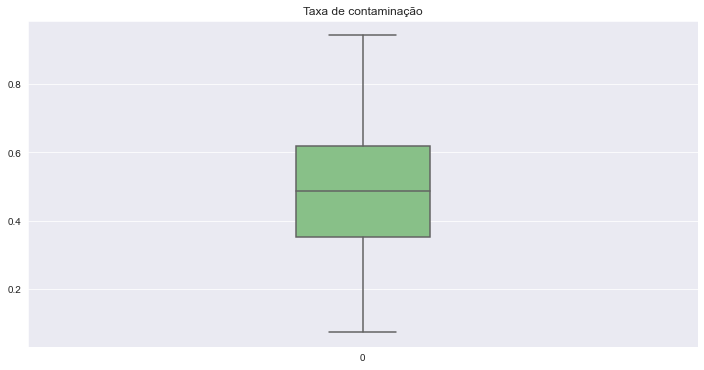

In [219]:
ax = sns.boxplot(data=df_conexoes['prob_V1_V2'], width = 0.2)
ax.figure.set_size_inches(12,6)
ax.set_title('Taxa de contaminação')
ax

In [214]:
#Observando a descrição do dataframe conexões, não aparentar ter outliers
#Taxa de contaminação entre 0.074462 e 0.942245
df_conexoes.describe(include='all')

,V1,V2,grau,proximidade,prob_V1_V2
count,999999.000000,999999.000000,999999,999999,499999.000000
unique,NaN,NaN,3,4,NaN
top,NaN,NaN,trabalho,visita_rara,NaN
freq,NaN,NaN,333548,400238,NaN
mean,250000.250000,500001.000000,NaN,NaN,0.485162
std,144337.495129,288674.990257,NaN,NaN,0.173963
min,1.000000,2.000000,NaN,NaN,0.074462
25%,125000.500000,250001.500000,NaN,NaN,0.351677
50%,250000.000000,500001.000000,NaN,NaN,0.486413
75%,375000.000000,750000.500000,NaN,NaN,0.618210


<AxesSubplot:title={'center':'Faixa etária dos individuos'}>

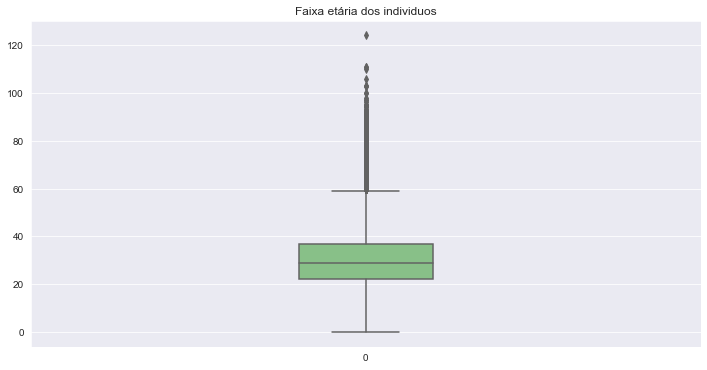

In [222]:
ax = sns.boxplot(data=df_individuos['idade'], width = 0.2)
ax.figure.set_size_inches(12,6)
ax.set_title('Faixa etária dos individuos')
ax

<AxesSubplot:title={'center':'Quantidade de filho dos individuos'}>

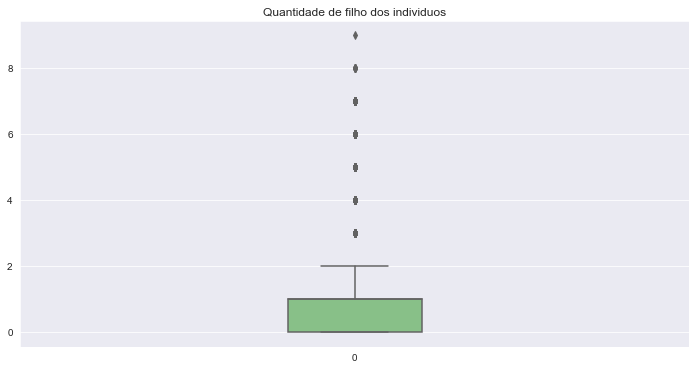

In [223]:
ax = sns.boxplot(data=df_individuos['qt_filhos'], width = 0.2)
ax.figure.set_size_inches(12,6)
ax.set_title('Quantidade de filho dos individuos')
ax

<AxesSubplot:title={'center':'IMC dos individuos'}>

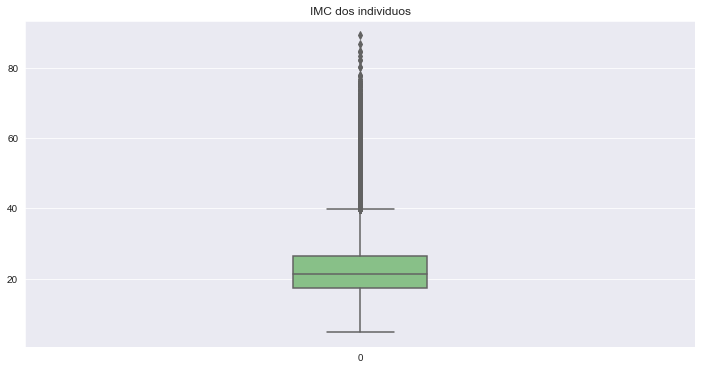

In [224]:
ax = sns.boxplot(data=df_individuos['IMC'], width = 0.2)
ax.figure.set_size_inches(12,6)
ax.set_title('IMC dos individuos')
ax

# <font color='gray' style='font-size: 20px;'>Observando descrição para analisar esses possíveis outliers</font>

In [215]:
#Observando a descrição do dataframe individuos:

#Idade: pode ter recém nascido (0 anos) e a pessoa mais velha do mundo registrada tinha a idade de 122 anos. Mas, ano passado (2021), um homem de 127 anos pode ter sido a pessoa mais velha do mundo.
#Fonte: https://www.ebiografia.com/pessoa_mais_velha_do_mundo/
#Fonte: https://aventurasnahistoria.uol.com.br/noticias/historia-hoje/homem-que-morreu-aos-127-anos-pode-quebrar-recorde-de-pessoa-mais-velha-do-mundo.phtml
#Valores podem está ok

#qt_filhos: pessoas podem ter nenhum filho como podem ter 9.
#Valores podem está ok

#Jon Brower foi o ser humano mais pesado da história, com um peso de aproximadamente 634 kg e tinha a altura de 1,85, gerando um IMC de 185.2.
#Fonte: https://top10mais.org/top-10-pessoas-mais-pesadas-do-mundo/
#Valores podem está ok
df_individuos.describe(include='all')

,name,idade,estado_civil,qt_filhos,estuda,trabalha,pratica_esportes,transporte_mais_utilizado,IMC
count,1000000.000000,904063.000000,949927,971133.000000,959870.000000,993647.000000,850876.000000,956967,886130.000000
unique,NaN,NaN,4,NaN,NaN,NaN,NaN,3,NaN
top,NaN,NaN,solteiro,NaN,NaN,NaN,NaN,publico,NaN
freq,NaN,NaN,420637,NaN,NaN,NaN,NaN,574779,NaN
mean,500000.500000,30.008431,NaN,0.928406,0.442588,0.556739,0.599823,NaN,22.472079
std,288675.278932,10.951566,NaN,0.997289,0.496693,0.496771,0.489934,NaN,7.073692
min,1.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN,4.852828
25%,250000.750000,22.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN,17.420851
50%,500000.500000,29.000000,NaN,1.000000,0.000000,1.000000,1.000000,NaN,21.431200
75%,750000.250000,37.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,26.378197


In [212]:
#A abordagem de intervalo interquartil IQR (intervalo interquartil) pode ser usada para encontrar valores discrepantes.
#Porém os dados aparenta está ok, pois: podem haver récem nascidos como pessoas de 124 anos, os individuos podem ter 9 filhos, e pode haver individuos com obesidade grau IV (superobesos) com IMC de 89.
def verificando_removendo_outliers(df, colunas):
    for atributo in colunas:
        print("Limpeza do atributo {}".format(atributo))
        Q1 = np.percentile(df[atributo], 25,
                           interpolation = 'midpoint')

        Q3 = np.percentile(df[atributo], 75,
                           interpolation = 'midpoint')
        IQR = Q3 - Q1

        print("velho formato: ", df.shape)

        # Upper bound
        upper = np.where(df[atributo] >= (Q3+1.5*IQR))
        # Lower bound
        lower = np.where(df[atributo] <= (Q1-1.5*IQR))

        #Removendo as outliers
        df.drop(upper[0], inplace = True, errors='ignore')
        df.drop(lower[0], inplace = True, errors='ignore')

        print("Novo formato: ", df.shape)
        print("\n")